# TP FINAL - EQUIDAD EN ML

### **1. Conjunto de datos**

##### **c) preprocesamiento y EDA**

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 


df = pd.concat([X, y], axis=1)


In [5]:

# metadata 
# print(statlog_german_credit_data.metadata) 
  

df

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [6]:
# Diccionario de mapeos en español
attribute_map = {
    "Attribute1": {
        "A11": "< 0 DM",
        "A12": "0 <= ... < 200 DM",
        "A13": ">= 200 DM / asignaciones salariales",
        "A14": "sin cuenta corriente",
    },
    "Attribute3": {
        "A30": "sin créditos / todos pagados",
        "A31": "todos los créditos en este banco pagados",
        "A32": "créditos existentes pagados debidamente",
        "A33": "retraso en el pago",
        "A34": "cuenta crítica / otros créditos",
    },
    "Attribute4": {
        "A40": "coche (nuevo)",
        "A41": "coche (usado)",
        "A42": "muebles/equipos",
        "A43": "radio/televisión",
        "A44": "electrodomésticos",
        "A45": "reparaciones",
        "A46": "educación",
        "A47": "vacaciones (?)",
        "A48": "reentrenamiento",
        "A49": "negocios",
        "A410": "otros",
    },
    "Attribute6": {
        "A61": "< 100 DM",
        "A62": "100 <= ... < 500 DM",
        "A63": "500 <= ... < 1000 DM",
        "A64": ">= 1000 DM",
        "A65": "desconocido / sin ahorros",
    },
    "Attribute7": {
        "A71": "desempleado",
        "A72": "< 1 año",
        "A73": "1 <= ... < 4 años",
        "A74": "4 <= ... < 7 años",
        "A75": ">= 7 años",
    },
    "Attribute9": {
        "A91": "hombre: divorciado/separado",
        "A92": "mujer: divorciada/separada/casada",
        "A93": "hombre: soltero",
        "A94": "hombre: casado/viudo",
        "A95": "mujer: soltera",
    },
    "Attribute10": {
        "A101": "ninguno",
        "A102": "co-solicitante",
        "A103": "garante",
    },
    "Attribute12": {
        "A121": "bienes raíces",
        "A122": "sociedad de construcción / seguro",
        "A123": "coche u otro",
        "A124": "desconocido / sin propiedad",
    },
    "Attribute14": {
        "A141": "banco",
        "A142": "tiendas",
        "A143": "ninguno",
    },
    "Attribute15": {
        "A151": "alquiler",
        "A152": "propio",
        "A153": "gratis",
    },
    "Attribute17": {
        "A171": "desempleado / no calificado - no residente",
        "A172": "no calificado - residente",
        "A173": "empleado calificado / oficial",
        "A174": "gestión / autónomo / altamente calificado",
    },
    "Attribute19": {
        "A191": "sin teléfono",
        "A192": "sí, registrado a nombre",
    },
    "Attribute20": {
        "A201": "sí (trabajador extranjero)",
        "A202": "no (no trabajador extranjero)",
    },
}


for attr, mapping in attribute_map.items():
    df[attr] = df[attr].map(mapping)


In [7]:
df.rename(columns={
    'Attribute1': 'cuenta_corriente',
    'Attribute2': 'duracion_credito_meses',
    'Attribute3': 'historial_crediticio',
    'Attribute4': 'proposito_credito',
    'Attribute5': 'monto_credito',
    'Attribute6': 'cuenta_ahorros',
    'Attribute7': 'antiguedad_empleo',
    'Attribute8': 'tasa_cuota_ingreso',
    'Attribute9': 'estado_civil_genero',
    'Attribute10': 'otros_deudores',
    'Attribute11': 'residencia_actual_anios',
    'Attribute12': 'propiedad',
    'Attribute13': 'edad',
    'Attribute14': 'otros_planes_pago',
    'Attribute15': 'tipo_vivienda',
    'Attribute16': 'cantidad_creditos_existentes',
    'Attribute17': 'ocupacion',
    'Attribute18': 'personas_a_cargo',
    'Attribute19': 'tiene_telefono',
    'Attribute20': 'trabajador_extranjero',
    'class': 'clase_pred'
}, inplace=True)


In [8]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


df['estado_civil_genero'].unique()


Summary Statistics:
            cuenta_corriente  duracion_credito_meses  \
count                   1000             1000.000000   
unique                     4                     NaN   
top     sin cuenta corriente                     NaN   
freq                     394                     NaN   
mean                     NaN               20.903000   
std                      NaN               12.058814   
min                      NaN                4.000000   
25%                      NaN               12.000000   
50%                      NaN               18.000000   
75%                      NaN               24.000000   
max                      NaN               72.000000   

                           historial_crediticio proposito_credito  \
count                                      1000              1000   
unique                                        5                10   
top     créditos existentes pagados debidamente  radio/televisión   
freq                          

array(['hombre: soltero', 'mujer: divorciada/separada/casada',
       'hombre: divorciado/separado', 'hombre: casado/viudo'],
      dtype=object)

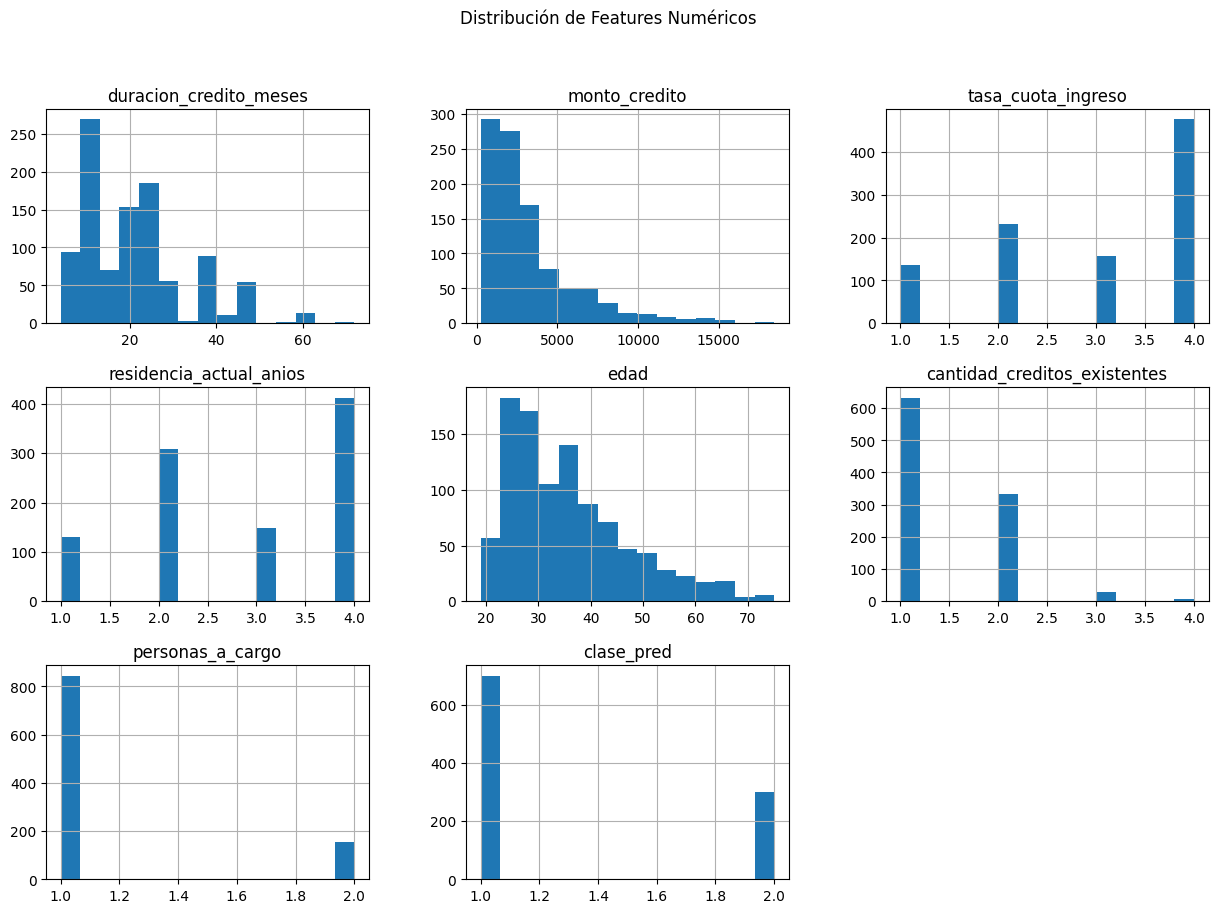

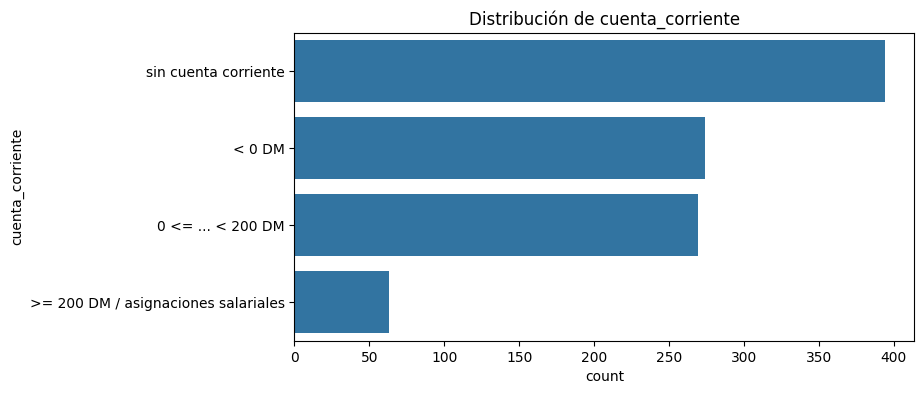

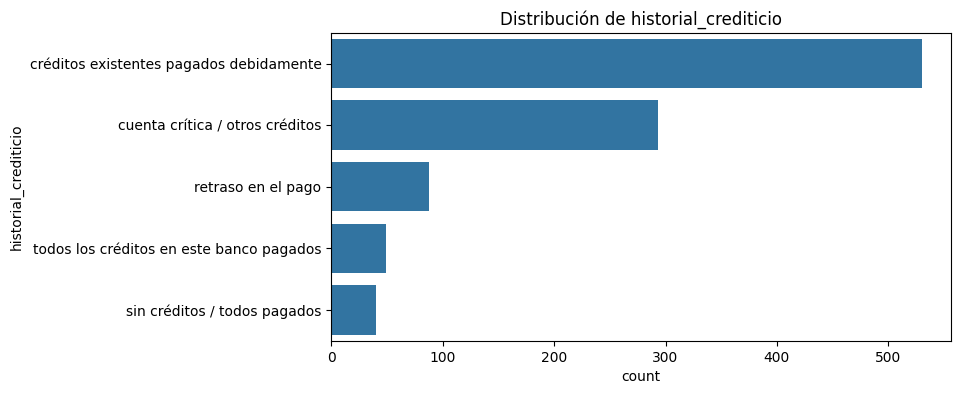

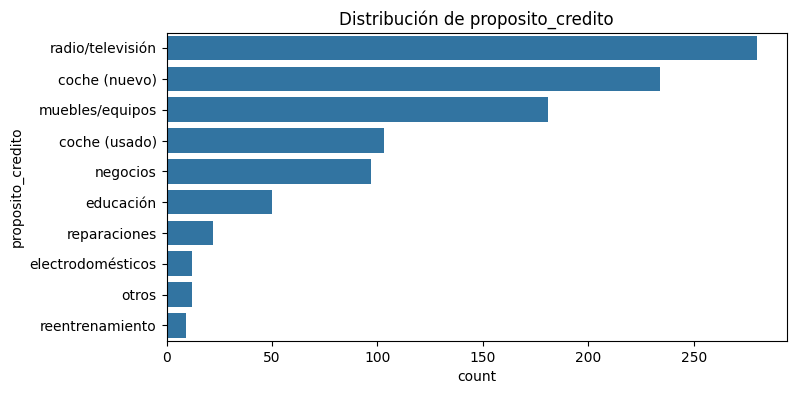

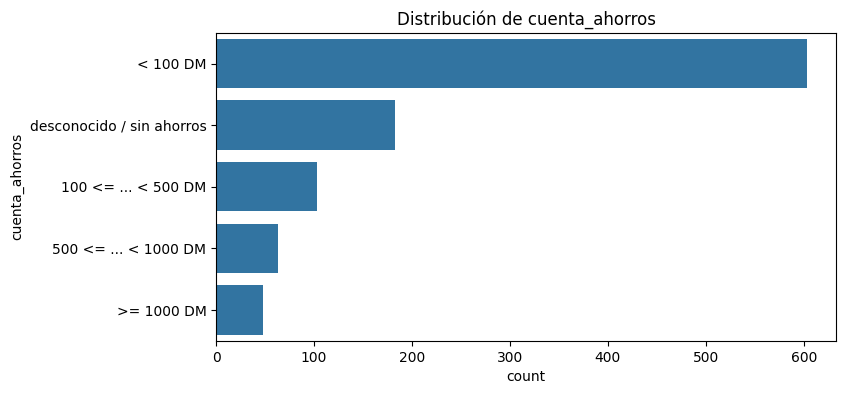

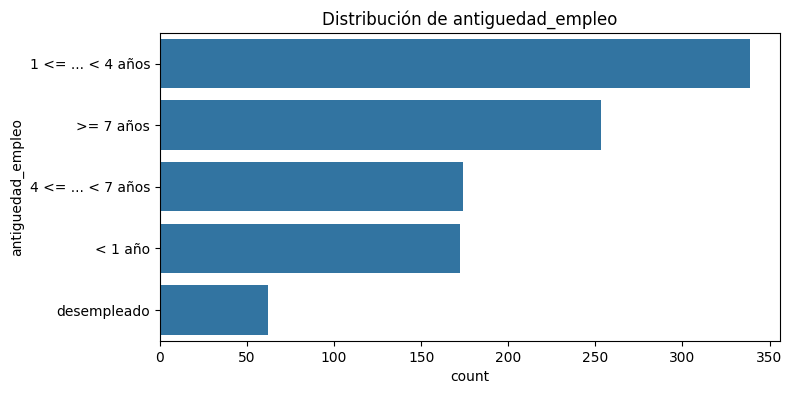

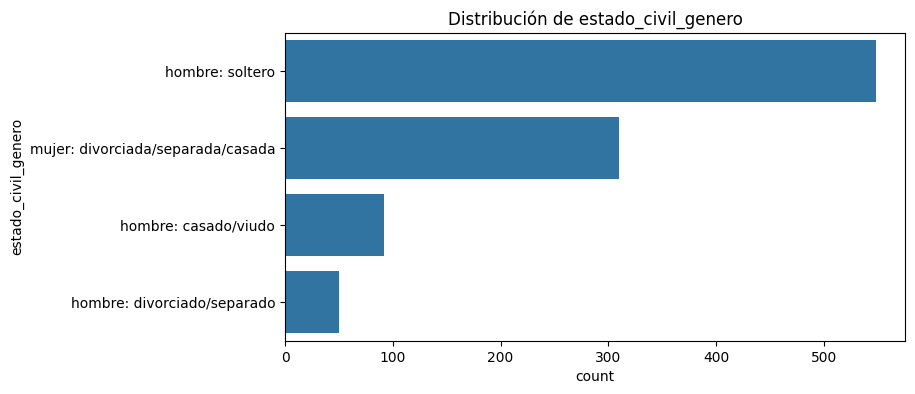

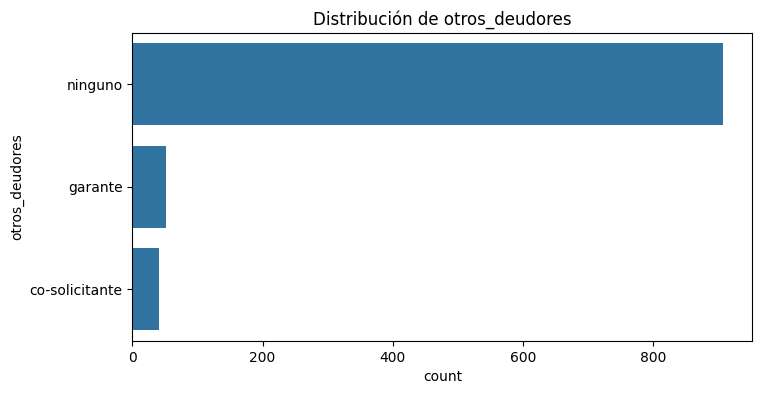

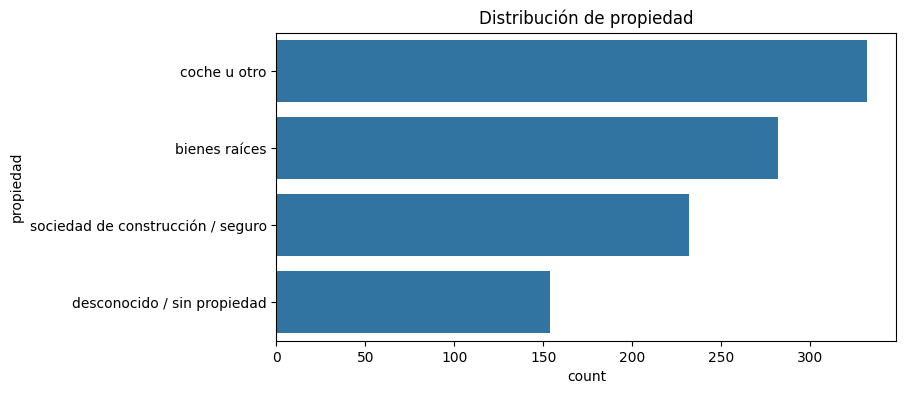

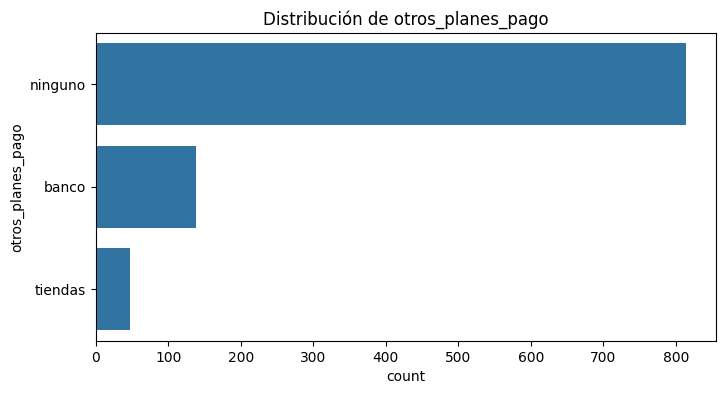

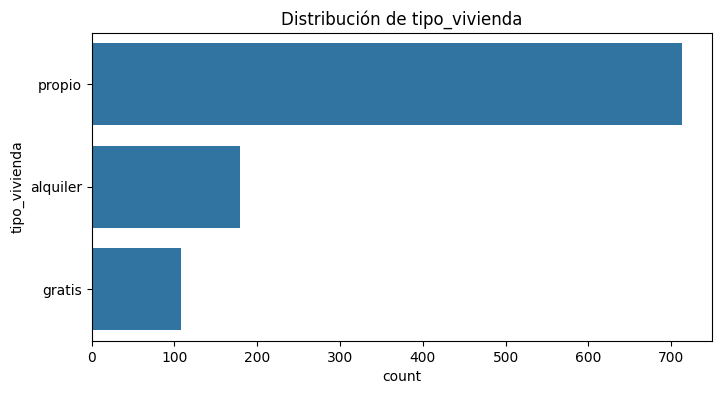

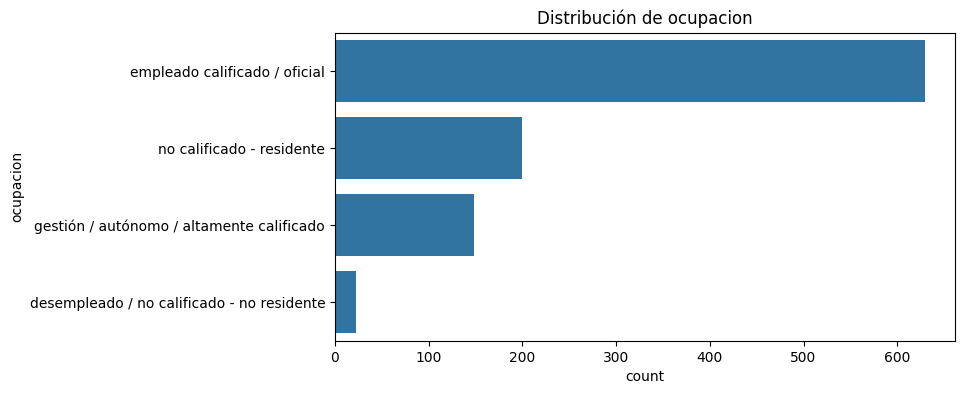

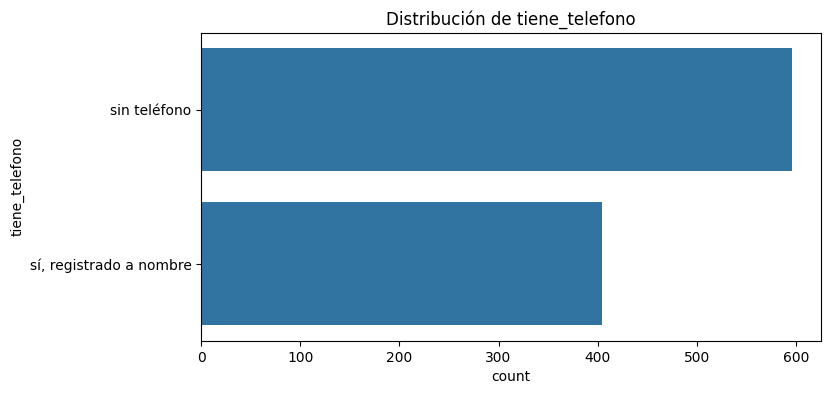

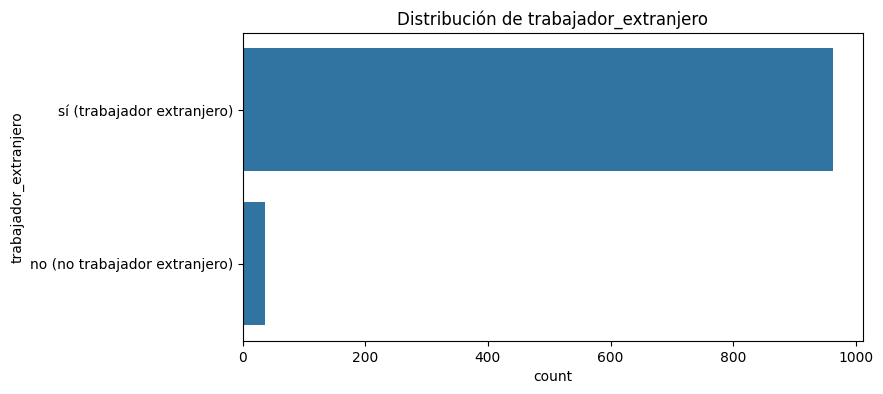

In [9]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribución de Features Numéricos')
plt.show()

# Count plots for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.show()

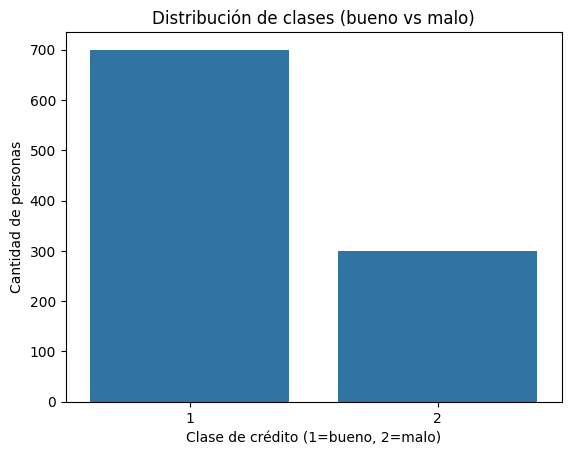

clase_pred
1    70.0
2    30.0
Name: proportion, dtype: float64


In [10]:
# Conteo de clases
sns.countplot(x='clase_pred', data=df)
plt.title("Distribución de clases (bueno vs malo)")
plt.xlabel("Clase de crédito (1=bueno, 2=malo)")
plt.ylabel("Cantidad de personas")
plt.show()

# Porcentaje por clase
print(df['clase_pred'].value_counts(normalize=True) * 100)


In [11]:
df['genero'] = df['estado_civil_genero'].apply(lambda x: 'femenino' if x.startswith('mujer') else 'masculino')
df[['genero', 'estado_civil']] = df['estado_civil_genero'].str.split(': ', expand=True)
df['genero'] = df['genero'].map({'mujer': 'femenino', 'hombre': 'masculino'})


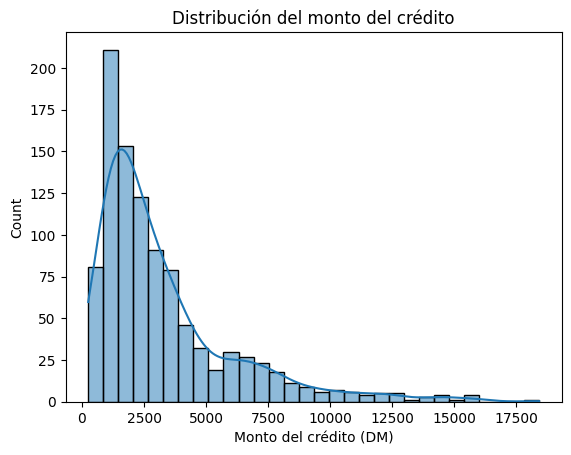

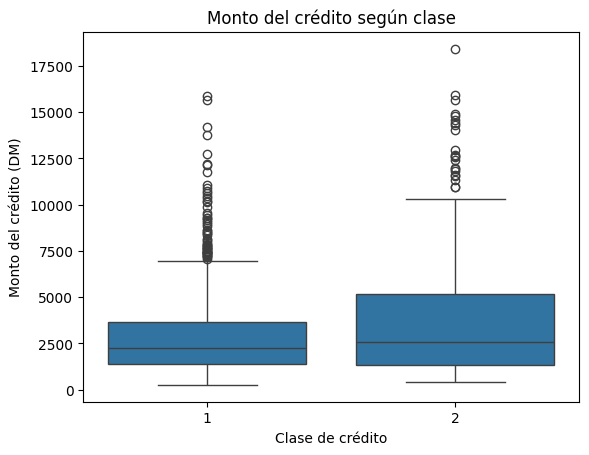

In [12]:
# Histograma
sns.histplot(df['monto_credito'], bins=30, kde=True)
plt.title("Distribución del monto del crédito")
plt.xlabel("Monto del crédito (DM)")
plt.show()

# Boxplot por clase
sns.boxplot(x='clase_pred', y='monto_credito', data=df)
plt.title("Monto del crédito según clase")
plt.xlabel("Clase de crédito")
plt.ylabel("Monto del crédito (DM)")
plt.show()


🔍 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   cuenta_corriente              1000 non-null   object
 1   duracion_credito_meses        1000 non-null   int64 
 2   historial_crediticio          1000 non-null   object
 3   proposito_credito             1000 non-null   object
 4   monto_credito                 1000 non-null   int64 
 5   cuenta_ahorros                1000 non-null   object
 6   antiguedad_empleo             1000 non-null   object
 7   tasa_cuota_ingreso            1000 non-null   int64 
 8   estado_civil_genero           1000 non-null   object
 9   otros_deudores                1000 non-null   object
 10  residencia_actual_anios       1000 non-null   int64 
 11  propiedad                     1000 non-null   object
 12  edad                          1000 non-nul

None


📊 Estadísticas generales:


,duracion_credito_meses,monto_credito,tasa_cuota_ingreso,residencia_actual_anios,edad,cantidad_creditos_existentes,personas_a_cargo,clase_pred
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000



🎯 Distribución de la variable objetivo (clase_pred):
clase_pred
1    0.7
2    0.3
Name: proportion, dtype: float64


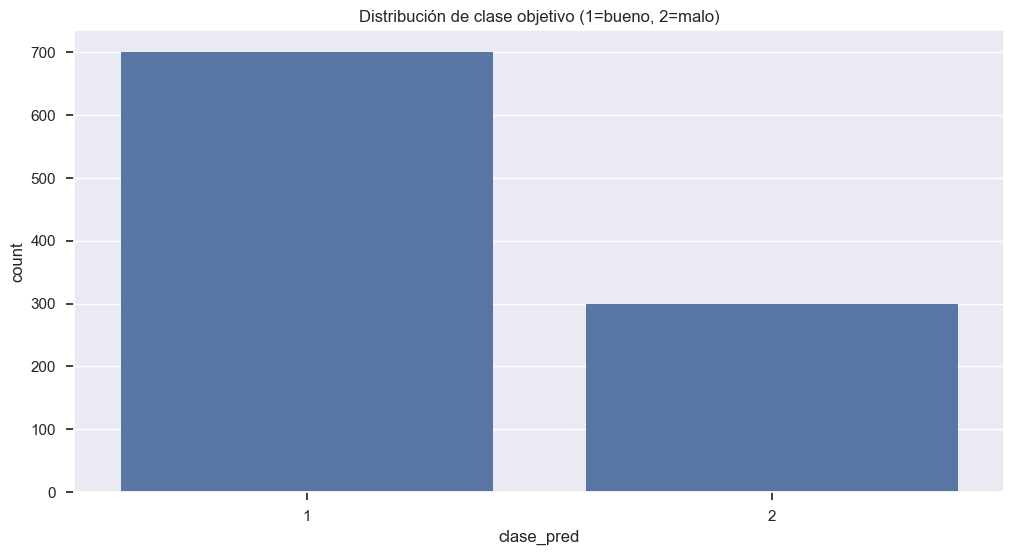

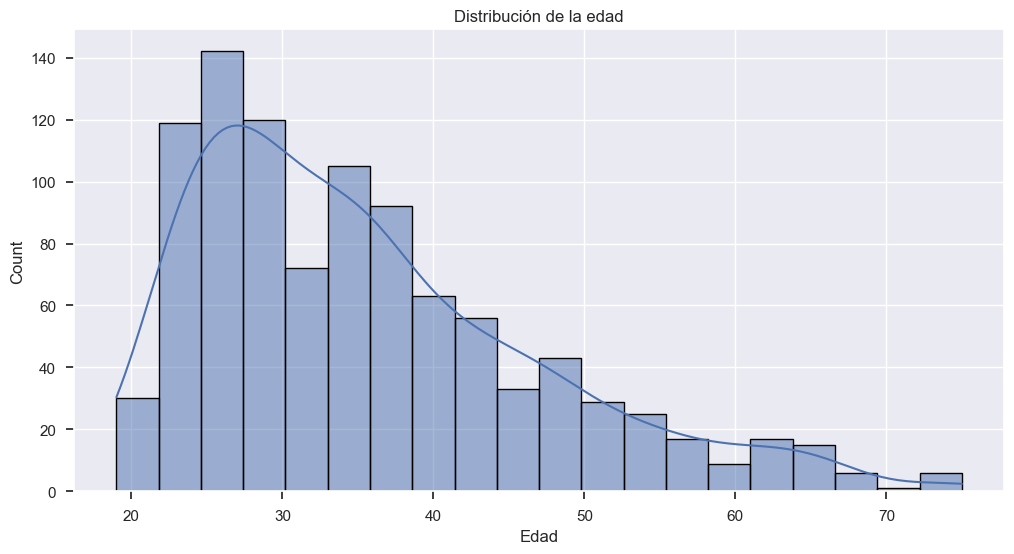

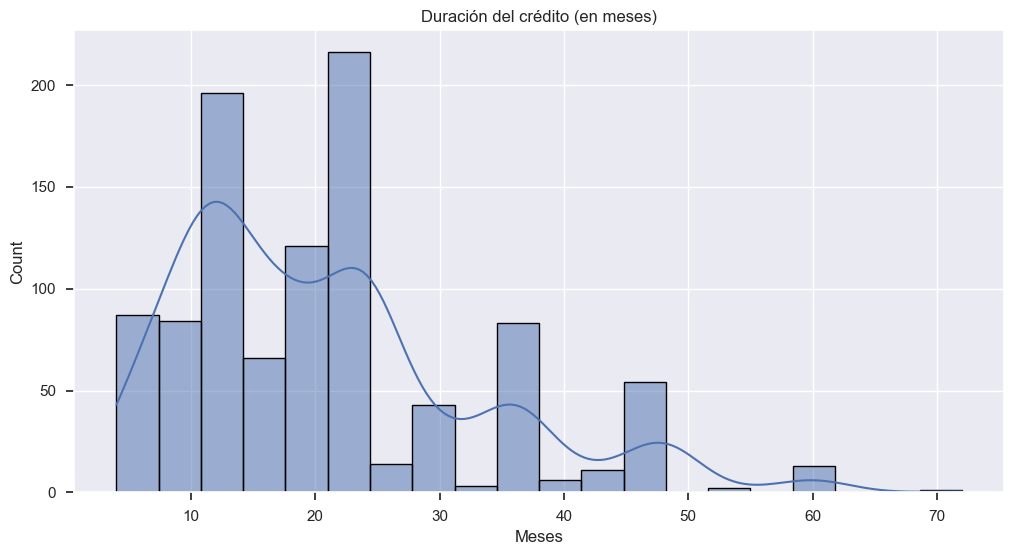

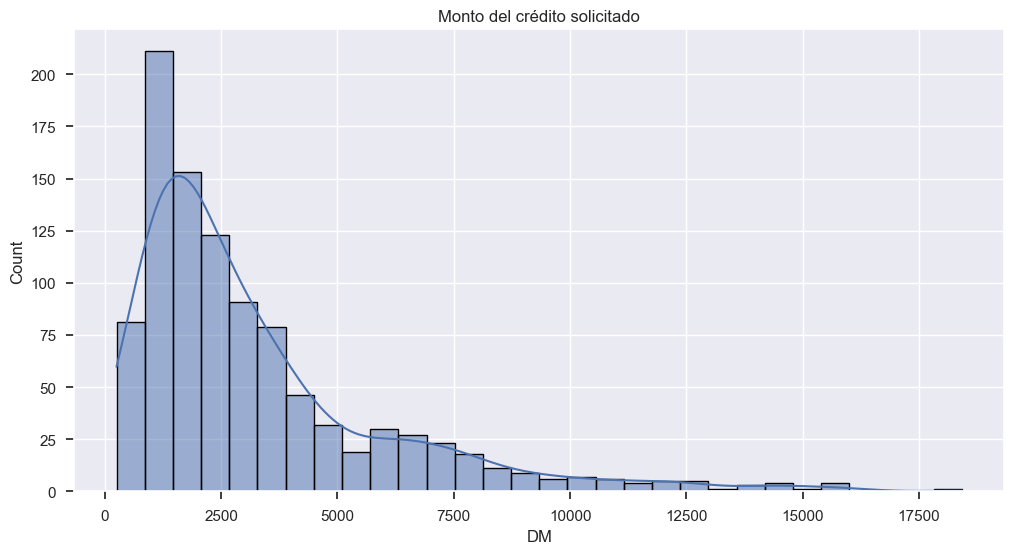


⚖️ Distribución por género:
genero
masculino    0.69
femenino     0.31
Name: proportion, dtype: float64


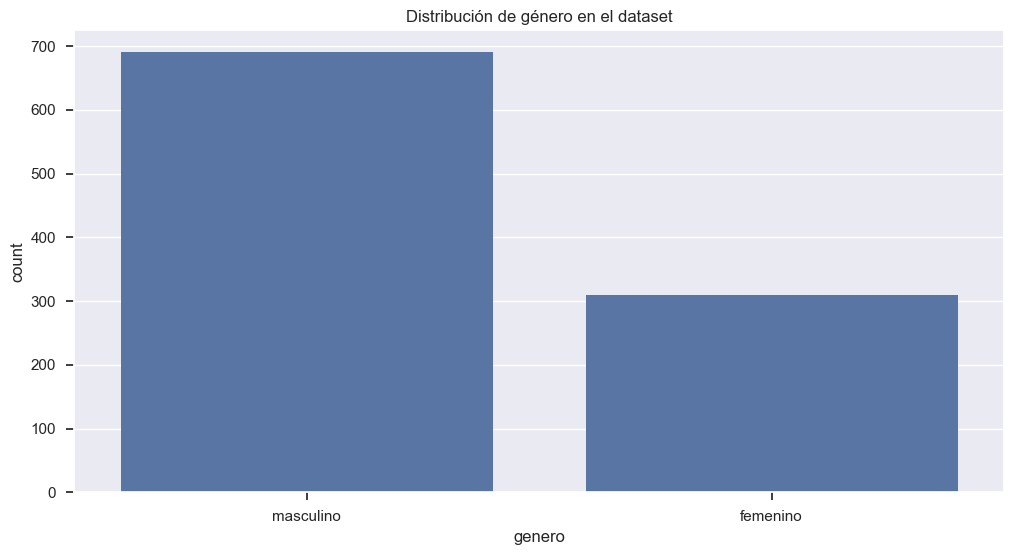


📌 Proporción de clase_pred por género:


clase_pred,1,2
genero,,
femenino,0.648387,0.351613
masculino,0.723188,0.276812


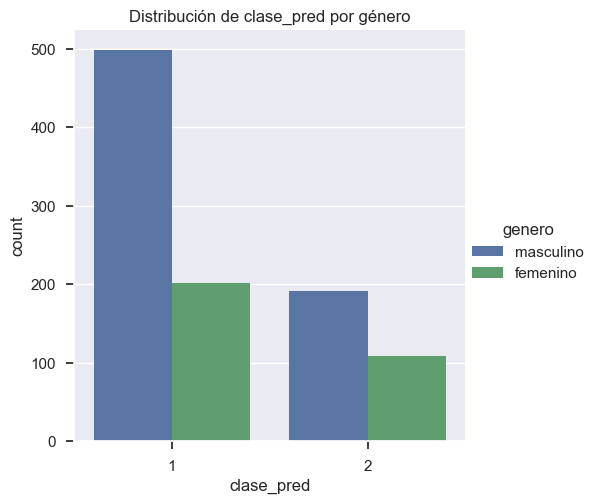

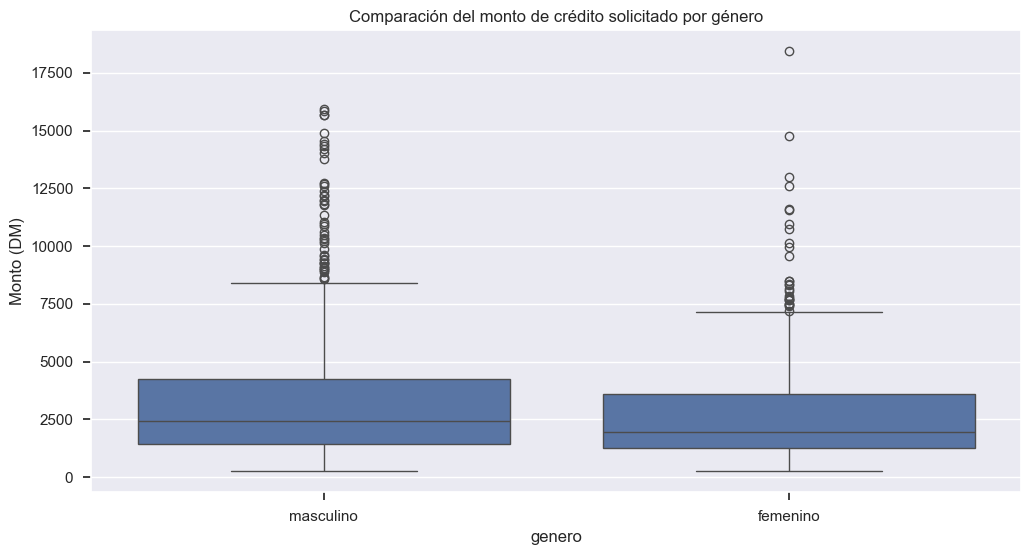

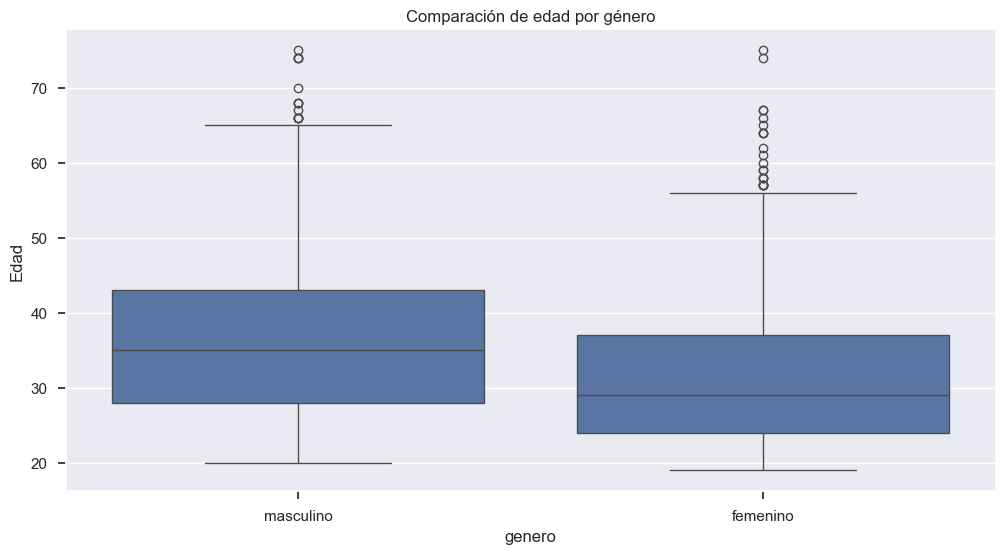

In [13]:
# Tamaño base de los gráficos
plt.style.use('seaborn-v0_8')
sns.set_context('notebook')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Info general
print("🔍 Información general del dataset:")
display(df.info())

# 2. Estadísticas básicas
print("\n📊 Estadísticas generales:")
display(df.describe())

# 3. Distribución de la variable objetivo
print("\n🎯 Distribución de la variable objetivo (clase_pred):")
print(df['clase_pred'].value_counts(normalize=True))

sns.countplot(data=df, x='clase_pred')
plt.title('Distribución de clase objetivo (1=bueno, 2=malo)')
plt.show()

# 4. Distribución de edades
sns.histplot(data=df, x='edad', bins=20, kde=True)
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.show()

# 5. Duración del crédito
sns.histplot(data=df, x='duracion_credito_meses', bins=20, kde=True)
plt.title('Duración del crédito (en meses)')
plt.xlabel('Meses')
plt.show()

# 6. Monto del crédito
sns.histplot(data=df, x='monto_credito', bins=30, kde=True)
plt.title('Monto del crédito solicitado')
plt.xlabel('DM')
plt.show()

# 7. Distribución de género
print("\n⚖️ Distribución por género:")
print(df['genero'].value_counts(normalize=True))

sns.countplot(data=df, x='genero')
plt.title('Distribución de género en el dataset')
plt.show()

# 8. Clase por género (SESGO)
print("\n📌 Proporción de clase_pred por género:")
display(df.groupby('genero')['clase_pred'].value_counts(normalize=True).unstack())

sns.catplot(data=df, kind='count', x='clase_pred', hue='genero')
plt.title('Distribución de clase_pred por género')
plt.show()

# 9. Comparación de monto solicitado según género
sns.boxplot(data=df, x='genero', y='monto_credito')
plt.title('Comparación del monto de crédito solicitado por género')
plt.ylabel('Monto (DM)')
plt.show()

# 10. Edad media por género
sns.boxplot(data=df, x='genero', y='edad')
plt.title('Comparación de edad por género')
plt.ylabel('Edad')
plt.show()


#### **1. d) 📌 Identificación de sesgos potenciales**

In [14]:
# Representación total por género
print("📊 Distribución total por género:")
display(df['genero'].value_counts(normalize=True).rename('Proporción'))

# Distribución por género de la clase_pred = 1 (bueno)
aprobados = df[df['clase_pred'] == 1]
print("\n📊 Distribución por género entre aprobados:")
display(aprobados['genero'].value_counts(normalize=True).rename('Proporción'))

# Comparación lado a lado
pivot = df.groupby('genero')['clase_pred'].value_counts(normalize=True).unstack().rename(columns={1: 'bueno', 2: 'malo'})
print("\n📊 Proporción de aprobados/rechazados por género:")
display(pivot)


📊 Distribución total por género:


genero
masculino    0.69
femenino     0.31
Name: Proporción, dtype: float64


📊 Distribución por género entre aprobados:


genero
masculino    0.712857
femenino     0.287143
Name: Proporción, dtype: float64


📊 Proporción de aprobados/rechazados por género:


clase_pred,bueno,malo
genero,,
femenino,0.648387,0.351613
masculino,0.723188,0.276812


**Distribución de género en el dataset:**
- Masculino: 69%

- Femenino: 31%

Esto muestra que el dataset está desbalanceado en términos de género, con mayor representación masculina.

*Distribución de aprobaciones por género (clase = 1):*

- Mujeres: 64.8%

- Hombres: 72.3%

Las mujeres tienen menor proporción de créditos aprobados que los hombres.

In [15]:
# Tasa de aprobación por género
tasa_mujer = len(df[(df['genero'] == 'femenino') & (df['clase_pred'] == 1)]) / len(df[df['genero'] == 'femenino'])
tasa_hombre = len(df[(df['genero'] == 'masculino') & (df['clase_pred'] == 1)]) / len(df[df['genero'] == 'masculino'])

disparate_impact = tasa_mujer / tasa_hombre

print(f"📐 Disparate Impact (Mujer / Hombre): {disparate_impact:.3f}")
if disparate_impact < 0.8:
    print("🔴 Posible sesgo: el grupo protegido recibe aprobaciones significativamente menores.")
else:
    print("🟢 No se observa disparate impact fuerte.")


📐 Disparate Impact (Mujer / Hombre): 0.897
🟢 No se observa disparate impact fuerte.


✅ Conclusión: No se viola la "regla del 80%" (umbral = 0.8), por lo que no hay un impacto dispar fuerte, aunque el valor está relativamente cerca.

Este es un estándar fuerte en fairness:

Si el valor cae por debajo de 0.8 (criterio del 80% rule), hay un disparate impact considerado discriminatorio.

En tu caso, está cerca pero aún dentro de lo aceptable → monitorizable, pero no claramente injusto.

In [16]:
aprob_mujer = df[(df['genero'] == 'femenino') & (df['clase_pred'] == 1)].shape[0] / df[df['genero'] == 'femenino'].shape[0] 
aprob_hombre = df[(df['genero'] == 'masculino') & (df['clase_pred'] == 1)].shape[0] / df[df['genero'] == 'masculino'].shape[0]

dpd = aprob_mujer - aprob_hombre
print(f"Diferencia de paridad demográfica (mujer - hombre): {dpd:.3f}")

Diferencia de paridad demográfica (mujer - hombre): -0.075


📉 Las mujeres son aprobadas un 7.5% menos que los hombres en proporción dentro de su grupo.

No es un sesgo extremo, pero sí es una diferencia concreta y significativa desde una perspectiva de equidad.

En un contexto bancario, si no hay justificación técnica clara (por ejemplo, variables correlacionadas con riesgo que estén desbalanceadas entre géneros), esto podría indicar una injusticia en la asignación.

Este hallazgo complementa muy bien el Disparate Impact (0.897): estás justo en el borde donde puede considerarse una diferencia preocupante.

##### **Conclusión - Análisis de sesgos por género**
Tras realizar un análisis exploratorio, se observó una distribución desbalanceada de género en el dataset: aproximadamente el 69% de las personas son hombres y el 31% mujeres. Esta disparidad se mantiene entre los casos aprobados.

Sin embargo, al analizar las tasas de aprobación por género, encontramos que:

- El 72.3% de los hombres reciben aprobación.

- El 64.8% de las mujeres reciben aprobación.

Esto se traduce en una *Demographic Parity Difference* de -0.075, indicando que las mujeres son aprobadas **7.5 puntos porcentuales menos** que los hombres en promedio. Además, el Disparate Impact calculado fue 0.897, lo que si bien no es considerado un sesgo fuerte (el umbral crítico suele ser 0.8), sí alerta sobre una diferencia que podría requerir revisión más profunda.

En conjunto, estos indicadores sugieren la **existencia de un posible sesgo de representación o trato desigual por género**, el cual será tenido en cuenta a la hora de construir y evaluar el modelo predictivo.

### **2. Creación de un modelo inicial**

#### **Selección modelo de clasificación - Entrenamiento, evaluación y resultados**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


In [18]:
df['estado_civil'].unique()

array(['soltero', 'divorciada/separada/casada', 'divorciado/separado',
       'casado/viudo'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder

ordered_columns = ['cuenta_corriente', 'cuenta_ahorros', 'antiguedad_empleo']
for col in ordered_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


# Variables sin orden inherente
# Variables sin orden inherente (incluyendo genero y estado_civil)
categorical_columns = [
    'historial_crediticio', 'proposito_credito', 'estado_civil_genero', 
    'otros_deudores', 'propiedad', 'otros_planes_pago', 'tipo_vivienda', 
    'ocupacion', 'tiene_telefono', 'trabajador_extranjero', 
    'genero', 'estado_civil'  # Nuevas columnas añadidas
]



df_model = pd.get_dummies(df, columns=categorical_columns, drop_first=True)



In [20]:
X = df_model.drop(columns=['clase_pred'])
y = df_model['clase_pred'].replace({1: 1, 2: 0})  # 1 es bueno, ahora pasa a ser la pred positiva, 2 es malo, ahora pasa a ser la pred negativa.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Preprocessing
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.33      0.43        60
           1       0.76      0.91      0.83       140

    accuracy                           0.74       200
   macro avg       0.69      0.62      0.63       200
weighted avg       0.72      0.74      0.71       200


Confusion Matrix:
[[ 20  40]
 [ 12 128]]


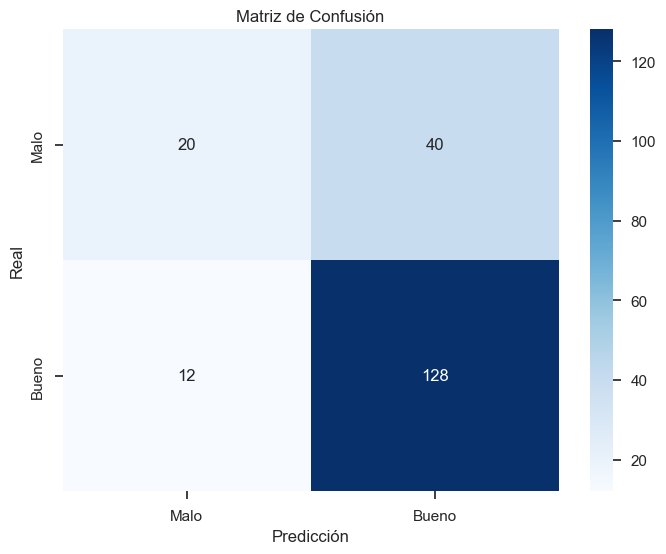

Verdaderos Negativos (TN): 20
Falsos Positivos (FP): 40
Falsos Negativos (FN): 12
Verdaderos Positivos (TP): 128


In [22]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malo', 'Bueno'], yticklabels=['Malo', 'Bueno'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdaderos Positivos (TP): {tp}")

In [23]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.6238095238095238

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score


# Definimos los hiperparámetros a testear
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced'],
    'max_features': ['sqrt', 'log2'],
}



precision_pagará = make_scorer(precision_score, pos_label=1)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring=precision_pagará,
    n_jobs=-1,
    verbose=1
)

# Ejecutamos
grid_search.fit(X_train, y_train)

# Mejor modelo y su evaluación
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)


Fitting 5 folds for each of 384 candidates, totalling 1920 fits


🔍 Mejor combinación de hiperparámetros:
{'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

📊 Nuevo classification report:
              precision    recall  f1-score   support

        Malo       0.50      0.63      0.56        60
       Bueno       0.82      0.73      0.77       140

    accuracy                           0.70       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.73      0.70      0.71       200

📉 Matriz de confusión:


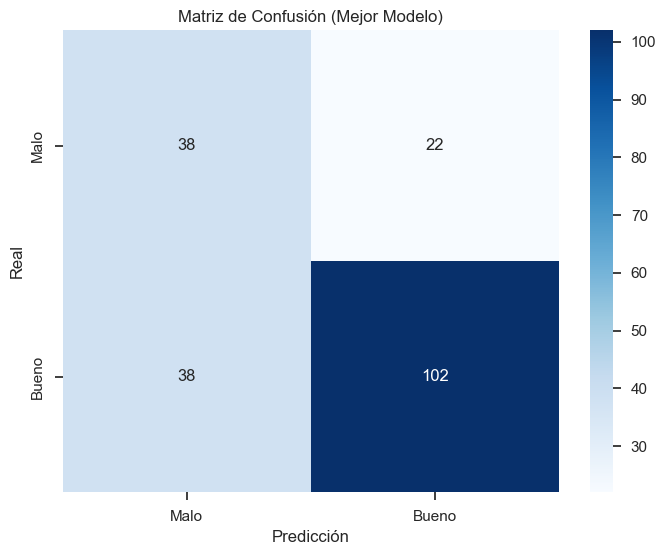

Verdaderos negativos (TN): 38
Falsos positivos (FP): 22
Falsos negativos (FN): 38
Verdaderos positivos (TP): 102


In [23]:

print("🔍 Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

print("\n📊 Nuevo classification report:")
print(classification_report(y_test, y_pred_best, target_names=['Malo', 'Bueno']))

print("📉 Matriz de confusión:")
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = ['Malo', 'Bueno'], yticklabels=['Malo', 'Bueno'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Mejor Modelo)')
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best).ravel()
print(f"Verdaderos negativos (TN): {tn}")
print(f"Falsos positivos (FP): {fp}")
print(f"Falsos negativos (FN): {fn}")
print(f"Verdaderos positivos (TP): {tp}")

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [27]:

# Entrenamos el modelo
xgb_model = XGBClassifier(
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluación
print("📊 Classification report:")
print(classification_report(y_test, y_pred_xgb))

print("📉 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_xgb))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb).ravel()

📊 Classification report:
              precision    recall  f1-score   support

           0       0.57      0.47      0.51        60
           1       0.79      0.85      0.82       140

    accuracy                           0.73       200
   macro avg       0.68      0.66      0.67       200
weighted avg       0.72      0.73      0.73       200

📉 Matriz de confusión:
[[ 28  32]
 [ 21 119]]


In [28]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 750, 1000],
    'max_depth': [10, 20, 30, 40],
    'class_weight': [None, 'balanced']
}

grid_search_xgb = GridSearchCV(
    xgb_model,
    param_grid,
    cv=5,
    scoring = 'precision',
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train)

best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

In [30]:

print("🔍 Mejor combinación de hiperparámetros:")
print(grid_search_xgb.best_params_)

print("\n📊 Classification report (mejorado):")
print(classification_report(y_test, y_pred_best_xgb))


🔍 Mejor combinación de hiperparámetros:
{'class_weight': None, 'max_depth': 10, 'n_estimators': 1000}

📊 Classification report (mejorado):
              precision    recall  f1-score   support

           0       0.58      0.53      0.56        60
           1       0.81      0.84      0.82       140

    accuracy                           0.74       200
   macro avg       0.69      0.68      0.69       200
weighted avg       0.74      0.74      0.74       200



📉 Matriz de confusión:


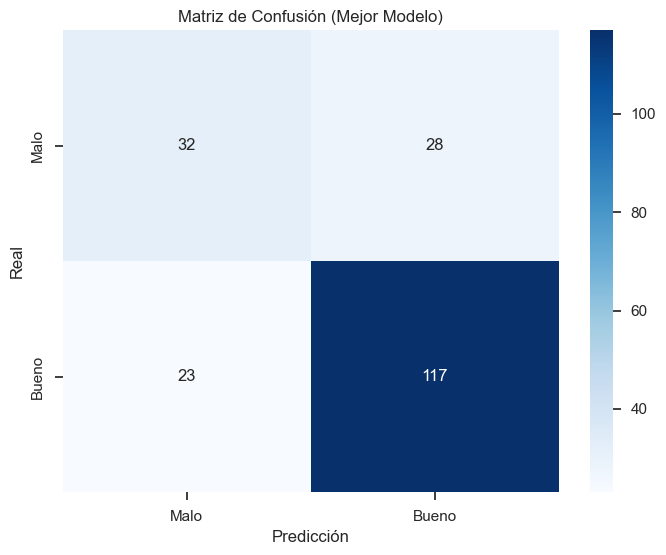

NameError: name 'y_pred_best' is not defined

In [ ]:

print("📉 Matriz de confusión:")
cm = confusion_matrix(y_test, y_pred_best_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = ['Malo', 'Bueno'], yticklabels=['Malo', 'Bueno'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Mejor Modelo)')
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best_).ravel()
print(f"Verdaderos negativos (TN): {tn}")
print(f"Falsos positivos (FP): {fp}")
print(f"Falsos negativos (FN): {fn}")
print(f"Verdaderos positivos (TP): {tp}")


##### **Análisis de errores: ¿Cuál es más costoso para el banco?**
Dado que el objetivo de la institución financiera es maximizar la cantidad de préstamos que efectivamente se pagan, es clave analizar el tipo de error que genera mayor impacto negativo.

En este contexto, existen dos errores posibles:

- Falso Positivo (FP): El modelo predice que el cliente pagará el préstamo, pero en realidad no lo hace.
Este error implica una pérdida directa para el banco, ya que otorga un préstamo que probablemente no se recupere.

- Falso Negativo (FN): El modelo predice que el cliente no pagará, pero en realidad sí lo haría.
Este error implica una pérdida de oportunidad, ya que el banco deja de ganar intereses por un préstamo que habría sido exitoso.

✅ Conclusión:
El error más costoso para el banco es el Falso Positivo, porque representa una pérdida financiera concreta, mientras que el Falso Negativo representa una oportunidad perdida, pero sin impacto directo en las finanzas.

¿Qué métrica priorizar?
Dado este análisis, no deberíamos enfocarnos únicamente en *accuracy*, ya que esa métrica puede estar sesgada si hay una clase mayoritaria (como suele pasar en este tipo de datasets).

En cambio, es recomendable:

✅ Priorizar la precisión (precision) de la clase positiva (pagadores): para asegurarnos de que los aprobados sean efectivamente buenos pagadores.

✅ O alternativamente, el recall de la clase negativa (morosos): para asegurarnos de atrapar la mayor cantidad posible de personas que no pagarían.

Esto depende también de los objetivos estratégicos del banco (ej. ser más inclusivo vs. ser más conservador), pero en términos de pérdidas, la precisión es clave.

### **3. Evaluación de equidad del modelo inicial**


Cuando un banco utiliza un modelo automático para predecir si una persona es “buena” o “mala” pagadora (es decir, si se le otorgará o no un crédito), es clave asegurarse de que el modelo no discrimine injustamente por variables como género, edad, nacionalidad, etc.

A continuación se describen los principales criterios de fairness, con foco en género como variable sensible (ej.: hombre vs. mujer), en este contexto:

🔹**1. Statistical Parity**

Definción aplicada: significa que la proporción de personas que reciben un préstamo (predicción = “bueno”) sea igual entre géneros.
📌 Ejemplo:
- Si el 70% de los hombres reciben un préstamo, entonces también el 70% de las mujeres deberían recibirlo, sin importar si en realidad pagarán o no.
⚠️ Crítica: Puede dar lugar a injusticias si un grupo tiene en promedio menos capacidad de pago, ya que se exige tratar igual a todos sin considerar el verdadero comportamiento crediticio.

🔹 **2. Equalized Odds**


Definición aplicada: Que el modelo cometa los mismos errores para todos los géneros, tanto Falsos Positivos (FP) como Falsos Negativos (FN).

📌 Ejemplo:
- La tasa de rechazos incorrectos (FN) entre mujeres debe ser igual que entre hombres.
- Y también la tasa de aprobaciones incorrectas (FP) debe ser igual entre géneros.

✅ Es un criterio más fuerte: no sólo se busca igualdad en el acceso, sino también igualdad en el tratamiento ante errores.

🔹 **3. Equal Opportunity**

Definición aplicad: caso particular de Equalized Odds que sólo exige igualdad en los Falsos Negativos.
📌 Ejemplo:
- Que la tasa de personas que sí iban a pagar pero fueron rechazadas por el modelo (FN) sea igual entre hombres y mujeres.

Es relevante si se quiere evitar dejar afuera injustamente a personas que sí deberían recibir el préstamo, lo que podría generar un sesgo estructural de exclusión.

🔹 **4. Predictive Parity**

Definición aplicada: que la precisión de las predicciones positivas (los que reciben el préstamo) sea igual entre géneros.
📌 Ejemplo:
Si el modelo predice que una persona va a pagar, la proporción real de personas que efectivamente lo hacen (precision) debe ser igual entre hombres y mujeres.

✅ Es útil para ver si las decisiones positivas del modelo tienen igual valor confiable sin importar el grupo.

--------------------------------------------

b. Objetivo: Ver si hay disparidad entre grupos (por ejemplo, entre géneros) en las métricas asociadas a cada tipo de fairness.

✅ Supuestos:
- Variable sensible: gender (ej. masculino/femenino)
- 1 → bueno (persona que pagará el crédito)
- 0 → malo (persona que no pagará)
- y_true: etiquetas verdaderas
- y_pred: predicciones del modelo
- grupo_A = Hombres
- grupo_B = Mujeres
- Umbral de tolerancia de disparidad: 0.1 (10%) → si la diferencia entre métricas > 0.1, consideramos que hay injusticia/falta de equidad

In [28]:
y_pred 

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [29]:
X.columns

Index(['cuenta_corriente', 'duracion_credito_meses', 'monto_credito',
       'cuenta_ahorros', 'antiguedad_empleo', 'tasa_cuota_ingreso',
       'residencia_actual_anios', 'edad', 'cantidad_creditos_existentes',
       'personas_a_cargo',
       'historial_crediticio_cuenta crítica / otros créditos',
       'historial_crediticio_retraso en el pago',
       'historial_crediticio_sin créditos / todos pagados',
       'historial_crediticio_todos los créditos en este banco pagados',
       'proposito_credito_coche (usado)', 'proposito_credito_educación',
       'proposito_credito_electrodomésticos',
       'proposito_credito_muebles/equipos', 'proposito_credito_negocios',
       'proposito_credito_otros', 'proposito_credito_radio/televisión',
       'proposito_credito_reentrenamiento', 'proposito_credito_reparaciones',
       'estado_civil_genero_hombre: divorciado/separado',
       'estado_civil_genero_hombre: soltero',
       'estado_civil_genero_mujer: divorciada/separada/casada',
     

In [30]:
X_test.index

Index([977, 735, 615, 413, 563,  27, 514, 624, 475, 991,
       ...
       383,  25, 297, 630, 798, 138, 442, 153, 325, 738],
      dtype='int64', length=200)

In [31]:
gender_test = df.loc[X_test.index, 'genero']

In [32]:
df.to_excel('german_credit_data.xlsx', index=False)

In [33]:
gender_test

977    masculino
735     femenino
615    masculino
413    masculino
563    masculino
         ...    
138    masculino
442    masculino
153     femenino
325    masculino
738    masculino
Name: genero, Length: 200, dtype: object

#### **Statistical Parity**
¿Qué medimos?
Proporción de personas a las que el modelo les predice que pagarán (positivos) en cada grupo.

Fórmula:

**SP = 𝑃(Ŷ = 1 ∣ grupo )**

In [34]:
sp_hombres = (y_pred_best[gender_test == 'masculino'] == 1).mean()
sp_mujeres = (y_pred_best[gender_test == 'femenino'] == 1).mean()
disparidad_sp = abs(sp_hombres - sp_mujeres)

si_o_no = disparidad_sp < 0.1


print(f"SP en hombres: {sp_hombres:.3f}")
print(f"SP en mujeres: {sp_mujeres:.3f}")
print(f'--' * 20)
print(f"Disparidad de SP: {disparidad_sp:.3f}")
print(f"¿Disparidad aceptable? {'Sí' if si_o_no else 'No'}")

SP en hombres: 0.657
SP en mujeres: 0.533
----------------------------------------
Disparidad de SP: 0.124
¿Disparidad aceptable? No


#### **Equalized Odds**
¿Qué medimos?
Tanto el TPR como el FPR deben ser iguales entre grupos.
⚠️ En este caso, se considera la mayor disparidad entre TPR y FPR.

Fórmula:

- **TPR = 𝑃(Ŷ = 1 ∣Y = 1, grupo)**
- **FPR = 𝑃(Ŷ = 1 ∣Y = 0, grupo)**

In [35]:
# True Positive Rate
tpr_m = ((y_pred_best == 1) & (y_test == 1) & (gender_test == 'masculino')).sum() / ((y_test == 1) & (gender_test == 'masculino')).sum()
tpr_f = ((y_pred_best == 1) & (y_test == 1) & (gender_test == 'femenino')).sum() / ((y_test == 1) & (gender_test == 'femenino')).sum()

# False Positive Rate
fpr_m = ((y_pred_best == 1) & (y_test == 0) & (gender_test == 'masculino')).sum() / ((y_test == 0) & (gender_test == 'masculino')).sum()
fpr_f = ((y_pred_best == 1) & (y_test == 0) & (gender_test == 'femenino')).sum() / ((y_test == 0) & (gender_test == 'femenino')).sum()

disparidad_equalized_odds = max(abs(tpr_m - tpr_f), abs(fpr_m - fpr_f))

print(f'TPR en hombres: {tpr_m:.3f}')
print(f'TPR en mujeres: {tpr_f:.3f}')
print(f'--'*50)
print(f'FPR en hombres: {fpr_m:.3f}')
print(f'FPR en mujeres: {fpr_f:.3f}')
print(f'--'*50)
print(f"Disparidad de Equalized Odds: {disparidad_equalized_odds:.3f}")
print(f"¿Disparidad aceptable? {'Sí' if disparidad_equalized_odds < 0.1 else 'No'}")


TPR en hombres: 0.770
TPR en mujeres: 0.625
----------------------------------------------------------------------------------------------------
FPR en hombres: 0.375
FPR en mujeres: 0.350
----------------------------------------------------------------------------------------------------
Disparidad de Equalized Odds: 0.145
¿Disparidad aceptable? No


#### **Equal Opportunity**
¿Qué medimos?
Recall (TPR) para la clase positiva (personas que sí iban a pagar), por grupo.

Fórmula:

**TPR = 𝑃(Ŷ = 1 ∣Y = 1, grupo)**

In [36]:
# Tasa de verdaderos positivos entre quienes efectivamente iban a pagar
eo_hombres = ((y_pred_best == 1) & (y_test == 1) & (gender_test == 'masculino')).sum() / ((y_test == 1) & (gender_test == 'masculino')).sum()    
eo_mujeres = ((y_pred_best == 1) & (y_test == 1) & (gender_test == 'femenino')).sum() / ((y_test == 1) & (gender_test == 'femenino')).sum()


disparidad_eo = abs(eo_hombres - eo_mujeres)

print(f'Tasa de verdaderos positivos (EO) hombres: {eo_hombres:.3f}')
print(f'Tasa de verdaderos positivos (EO) mujeres: {eo_mujeres:.3f}')
print(f'--'*50)

si_o_no = disparidad_eo < 0.1
print(f"Disparidad de EO: {disparidad_eo:.3f}")
print(f"¿Disparidad aceptable? {'Sí' if si_o_no else 'No'}")

Tasa de verdaderos positivos (EO) hombres: 0.770
Tasa de verdaderos positivos (EO) mujeres: 0.625
----------------------------------------------------------------------------------------------------
Disparidad de EO: 0.145
¿Disparidad aceptable? No


#### **Predictive Parity**
¿Qué medimos?
Precisión del modelo por grupo: entre los que predijo como positivos, ¿cuántos efectivamente lo eran?


Fórmula:

**PPV = 𝑃( Y = 1 ∣ Ŷ = 1, grupo)**

In [37]:
ppv_m = ((y_pred_best == 1) & (y_test == 1) & (gender_test == 'masculino')).sum() / ((y_pred_best == 1) & (gender_test == 'masculino')).sum()
ppv_f = ((y_pred_best == 1) & (y_test == 1) & (gender_test == 'femenino')).sum() / ((y_pred_best == 1) & (gender_test == 'femenino')).sum()
disparidad_ppv = abs(ppv_m - ppv_f)

print(f'Disparidad en PPV hombres: {ppv_m:.3f}')
print(f'Disparidad en PPV mujeres: {ppv_f:.3f}')
print(f'--'*30)

print(f"Disparidad de PPV: {disparidad_ppv:.3f}")
print(f"¿Disparidad aceptable? {'Sí' if disparidad_ppv < 0.1 else 'No'}")

Disparidad en PPV hombres: 0.837
Disparidad en PPV mujeres: 0.781
------------------------------------------------------------
Disparidad de PPV: 0.056
¿Disparidad aceptable? Sí


#### Recordando que forman parte del equipo del banco, cual de los criterios de fairness le parece relevante en este contexto. Justificar su elección.

En el contexto de un banco que otorga créditos, el objetivo principal es maximizar la aprobación de personas que efectivamente pagarán el préstamo, pero, muy especialmente, minimizar la concesión de créditos a personas que no pagarán (falsos positivos). Esto se traduce en la necesidad de controlar tanto la tasa de verdaderos positivos (TPR) como la tasa de falsos positivos (FPR).

Por ello, el criterio de fairness más relevante es Equalized Odds, ya que exige que ambos grupos protegidos (por ejemplo, mujeres y hombres) tengan tasas similares tanto de verdaderos positivos como de falsos positivos. Esto garantiza que el banco no incurra en un sesgo que afecte desproporcionadamente a un grupo, ya sea otorgándoles indebidamente créditos riesgosos o negándolos injustamente.

De esta forma, se protege el interés financiero de la institución y se asegura una equidad real en la evaluación crediticia, evitando pérdidas innecesarias y discriminación indirecta. Otros criterios, como Statistical Parity, podrían ignorar el costo real de los errores y no garantizarían esta protección económica ni equitativa.